In [15]:
#import libraries
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = 'C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Bike and Car/Train'
valid_path = 'C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Bike and Car/Test'

In [3]:
# Load pre-trained VGG19 model
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False



80134624/80134624 [==============================] - 59s 1us/step


In [4]:
 # useful for getting number of classes
folders = glob('C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Bike and Car/Train/*')


In [5]:
folders

['C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Bike and Car/Train\\Bikes',
 'C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Bike and Car/Train\\Car']

In [6]:
len(folders)

2

In [8]:
#Our layers - you can add more layer if you want
x=Flatten()(vgg19.output)
#Defined the output layer
prediction=Dense(len(folders),activation='softmax')(x)


# create a model object

In [10]:
model=Model(inputs=vgg19.input,outputs=prediction)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
#Tell the model -What cost & optimization method to use
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
#to perform image augmentation

from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

#Training set
print('Training length:\n')
training_set=train_datagen.flow_from_directory('C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Bike and Car/Train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')
print('='*100)

#Testing set
print('Test length:\n')

test_set=test_datagen.flow_from_directory('C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Bike and Car/Test',
                                         target_size=(224,224),
                                         batch_size=32,
                                         class_mode='categorical')

Training length:

Found 508 images belonging to 2 classes.
Test length:

Found 253 images belonging to 2 classes.


# Train the model


In [14]:
r=model.fit(training_set,
           validation_data=test_set,
           epochs=30,
           steps_per_epoch=len(training_set),
           validation_steps=len(test_set))


Epoch 1/30


 4/16 [======>.......................] - ETA: 40s - loss: 1.1242 - accuracy: 0.6094

C:\Users\Samanta Patil\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 [==============================] - 98s 6s/step - loss: 0.5516 - accuracy: 0.8091 - val_loss: 0.2033 - val_accuracy: 0.9130
Epoch 2/30
16/16 [==============================] - 116s 7s/step - loss: 0.1017 - accuracy: 0.9508 - val_loss: 0.0686 - val_accuracy: 0.9684
Epoch 3/30
16/16 [==============================] - 120s 8s/step - loss: 0.0226 - accuracy: 0.9961 - val_loss: 0.1072 - val_accuracy: 0.9644
Epoch 4/30
16/16 [==============================] - 116s 7s/step - loss: 0.0322 - accuracy: 0.9882 - val_loss: 0.0551 - val_accuracy: 0.9644
Epoch 5/30
16/16 [==============================] - 114s 7s/step - loss: 0.0218 - accuracy: 0.9941 - val_loss: 0.0525 - val_accuracy: 0.9644
Epoch 6/30
16/16 [==============================] - 124s 8s/step - loss: 0.0157 - accuracy: 0.9961 - val_loss: 0.0616 - val_accuracy: 0.9644
Epoch 7/30
16/16 [==============================] - 140s 9s/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0406 - val_accuracy: 0.9763
Epoch 8/30
16/16 [=======

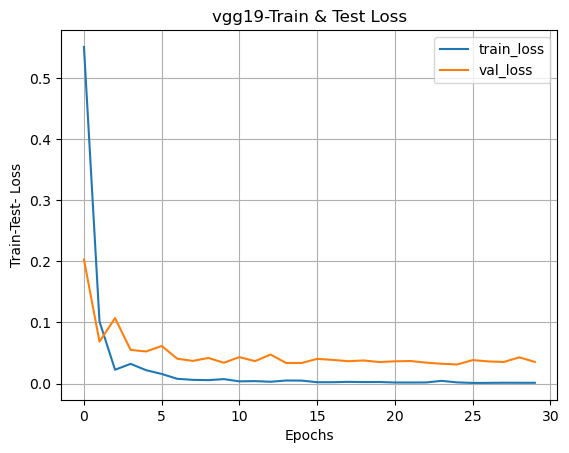

<Figure size 640x480 with 0 Axes>

In [16]:
#loss
plt.title('vgg19-Train & Test Loss')
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg19--Loss & Val_loss')

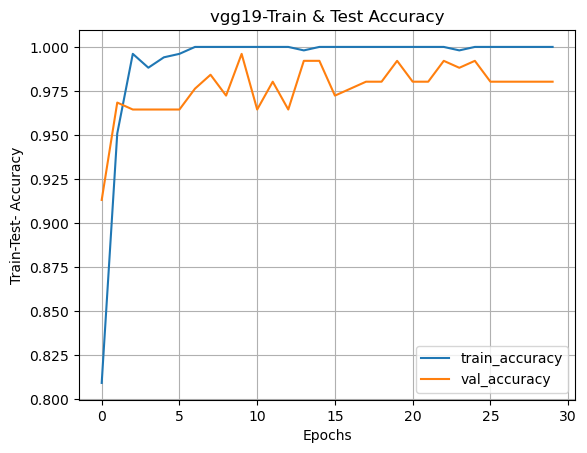

<Figure size 640x480 with 0 Axes>

In [17]:
#Accuracy
plt.title('vgg19-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('vgg19--Accuracy & Val_accuracy')

In [18]:
import tensorflow as tf
from keras.models import load_model
model.save('vgg19_bike vs car.h5')

C:\Users\Samanta Patil\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
model.save('vgg19_bike vs car.keras')

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
#Confusion Matrix & Classification report
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
ypred=model.predict(test_set,100//5)
ypred=np.argmax(ypred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes,ypred))
print('='*100)
print('Classification Report')
print(classification_report(test_set.classes,ypred,target_names=['Bike','Car']))
print('='*100)
print('Accuracy Score')
print(accuracy_score(test_set.classes,ypred))

8/8 [==============================] - 34s 4s/step
Confusion Matrix
[[72 67]
 [62 52]]
Classification Report
              precision    recall  f1-score   support

        Bike       0.54      0.52      0.53       139
         Car       0.44      0.46      0.45       114

    accuracy                           0.49       253
   macro avg       0.49      0.49      0.49       253
weighted avg       0.49      0.49      0.49       253

Accuracy Score
0.4901185770750988


<Axes: >

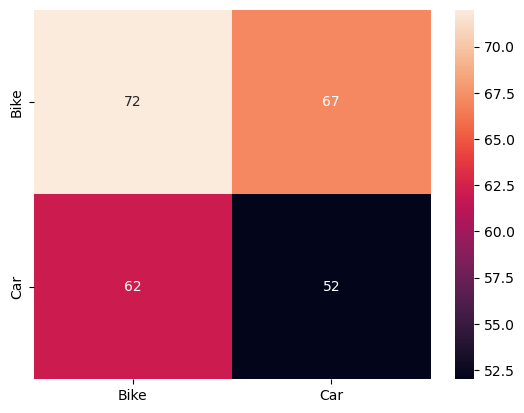

In [23]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes,ypred),annot=True,xticklabels=['Bike','Car'],
 yticklabels=['Bike','Car'])

# Multiclass

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet import MobileNet
from keras.applications.inception_v3 import preprocess_input as inception_preprocess_input
from keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = 'C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Footwear/Train'
valid_path = 'C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Footwear/Test'

In [4]:
#add preprocessing layer to the front ofmobilenet
mobilenet= MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#don't train existing weights 
for layer in mobilenet.layers: 
    layer.trainable =False



17225924/17225924 [==============================] - 11s 1us/step


In [5]:
# useful for getting number of classes
folders = glob('C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Footwear/Train/*')

In [6]:
folders

['C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Footwear/Train\\Boot',
 'C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Footwear/Train\\Sandal',
 'C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Footwear/Train\\Shoe']

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilenet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=mobilenet.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [9]:
# tell the model what cost and optimization method to use
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Footwear/Train',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Users/Samanta Patil/OneDrive/Deep Learning with Python/Footwear/Test',
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 474 images belonging to 3 classes.
Found 509 images belonging to 3 classes.


In [11]:
# Fit the model
r= model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10


15/15 [==============================] - 17s 901ms/step - loss: 14.5291 - accuracy: 0.3080 - val_loss: 6.7809 - val_accuracy: 0.3045
Epoch 2/10
15/15 [==============================] - 12s 819ms/step - loss: 7.9194 - accuracy: 0.3101 - val_loss: 6.7297 - val_accuracy: 0.2731
Epoch 3/10
15/15 [==============================] - 13s 844ms/step - loss: 6.3755 - accuracy: 0.2932 - val_loss: 5.1714 - val_accuracy: 0.3635
Epoch 4/10
15/15 [==============================] - 12s 797ms/step - loss: 5.8675 - accuracy: 0.3186 - val_loss: 6.8128 - val_accuracy: 0.3026
Epoch 5/10
15/15 [==============================] - 12s 776ms/step - loss: 6.8778 - accuracy: 0.3312 - val_loss: 6.1675 - val_accuracy: 0.3222
Epoch 6/10
15/15 [==============================] - 10s 703ms/step - loss: 6.9870 - accuracy: 0.2637 - val_loss: 4.5261 - val_accuracy: 0.5206
Epoch 7/10
15/15 [==============================] - 12s 792ms/step - loss: 6.2895 - accuracy: 0.3270 - val_loss: 4.4664 - val_accuracy: 0.3

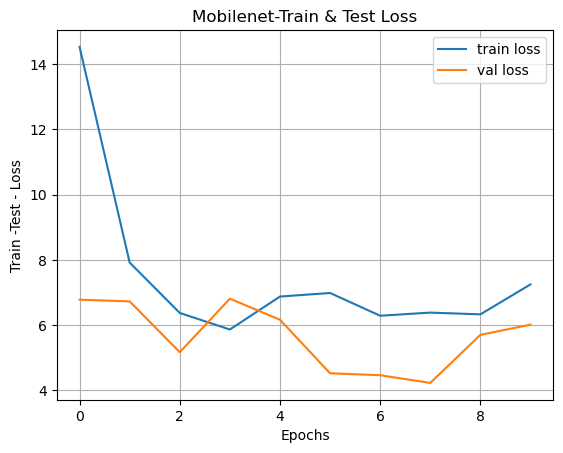

<Figure size 640x480 with 0 Axes>

In [14]:
# loss
plt.title('Mobilenet-Train & Test Loss')
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Train -Test - Loss')
plt.grid()
plt.legend()
plt.show()
plt.savefig('Mobilenet--LossVal_loss')

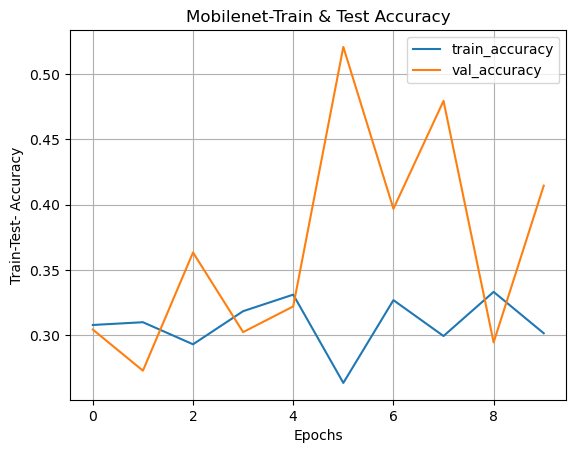

<Figure size 640x480 with 0 Axes>

In [15]:
#Accuracy
plt.title('Mobilenet-Train & Test Accuracy')
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Train-Test- Accuracy')
plt.grid()
plt.legend()
plt.show()
plt.savefig('Mobilenet--Accuracy & Val_accuracy')

In [16]:
import tensorflow as tf
from keras.models import load_model
model.save('Mobilenet_Footwear.h5')

C:\Users\Samanta Patil\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [18]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_set, 100 // 5)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = ['Boot', 'Sandal', 'Shoe']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

C:\Users\Samanta Patil\AppData\Local\Temp\ipykernel_23252\2790595166.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_set, 100 // 5)


Confusion Matrix
[[154   4  35]
 [124   4  30]
 [129   4  25]]
Classification Report
              precision    recall  f1-score   support

        Boot       0.38      0.80      0.51       193
      Sandal       0.33      0.03      0.05       158
        Shoe       0.28      0.16      0.20       158

    accuracy                           0.36       509
   macro avg       0.33      0.33      0.25       509
weighted avg       0.33      0.36      0.27       509



<Axes: >

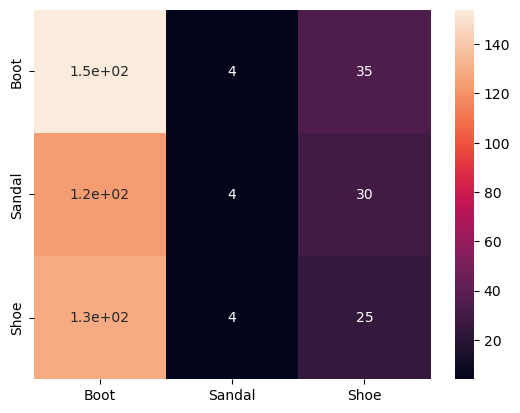

In [21]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_set.classes, y_pred),annot=True,xticklabels=['Boot', 'Sandal', 'Shoe'],
yticklabels=['Boot', 'Sandal', 'Shoe'])